# Test for ESD Data Science Graduate Programme Candidates

# I. Table of Contents

# II. Introduction

# III. Project Objective

# 1. Imports

In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from ydata_profiling import ProfileReport
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


In [176]:
df = pd.read_csv(r'C:\Users\mdhla\OneDrive\Documents\Postgraduate\MSc\SARB\sarb-data-science-exercise\data\data.csv')

# 2. Data Exploratory Analysis 

In [177]:
df.head()

,Date,GDP,GFCF,UNEM,ConsumerPrices,GovExp,HouseExp
0,1994-03-31,2347597.0,274432.0,20.0,25.666667,505201.0,1341416.0
1,1994-06-30,2370502.0,280433.0,20.0,26.000000,505206.0,1354509.0
2,1994-09-30,2397159.0,288152.0,20.0,27.000000,502942.0,1368367.0
3,1994-12-31,2441705.0,299025.0,20.0,27.333333,497292.0,1385567.0
4,1995-03-31,2447808.0,305911.0,17.0,28.000000,484801.0,1415147.0


In [178]:
df.tail()

,Date,GDP,GFCF,UNEM,ConsumerPrices,GovExp,HouseExp
116,2023-03-31,4614117.0,681444.0,33.0,108.000000,902634.0,3099111.0
117,2023-06-30,4645950.0,709479.0,33.0,109.666667,91656800.0,3100030.0
118,2023-09-30,4626804.0,676467.0,32.0,111.333333,921594.0,3095099.0
119,2023-12-31,4642859.0,674911.0,32.0,113.000000,918141.0,3096942.0
120,2024-03-31,4640222.0,662569.0,33.0,114.000000,915797.0,3087562.0


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            121 non-null    object 
 1   GDP             120 non-null    float64
 2   GFCF            120 non-null    float64
 3   UNEM            120 non-null    float64
 4   ConsumerPrices  120 non-null    float64
 5   GovExp          120 non-null    float64
 6   HouseExp        120 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.7+ KB


In [180]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GDP,120.0,6.688985e+06,3.278402e+07,2.347597e+06,2902988.25,3.899362e+06,4.450160e+06,362727300.0
GFCF,120.0,1.208034e+06,6.811389e+06,2.744320e+05,380164.75,6.525295e+05,7.548502e+05,75176200.0
UNEM,120.0,5.103333e+01,2.806991e+02,1.700000e+01,23.00,2.500000e+01,2.725000e+01,3100.0
ConsumerPrices,120.0,1.241222e+02,6.793871e+02,2.566667e+01,42.25,5.916667e+01,8.066667e+01,7500.0
GovExp,120.0,1.458945e+06,8.304558e+06,4.649380e+05,528066.50,7.368300e+05,8.531228e+05,91656800.0
HouseExp,120.0,4.670058e+06,2.573719e+07,1.341416e+06,1739040.50,2.438482e+06,2.834947e+06,284187900.0


In [181]:
print(f'The number of duplicated rows is: {sum(df.duplicated())}')

The number of duplicated rows is: 0


<Axes: >

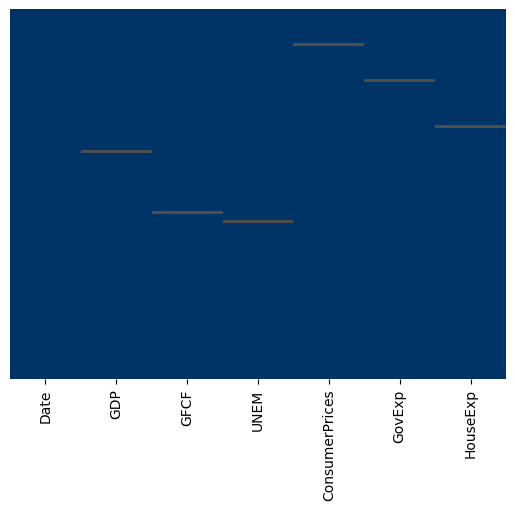

In [182]:
dark_blue = '#003366'
dark_grey = '#4d4d4d'


custom_cmap = sns.color_palette([dark_blue, dark_grey])
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap=custom_cmap)

## Data Cleaning

### Anomaly Detection

In [183]:
df.dropna(inplace=True)

def anomaly_per_column(df, feature_name):

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[[feature_name]])

    iso_forest = IsolationForest(contamination=0.001)
    iso_forest.fit(scaled_data)

    temp_df = df.copy()

    temp_df['Anomaly'] = iso_forest.predict(scaled_data)
    anomalies = temp_df[temp_df['Anomaly'] == -1]

    return anomalies[[feature_name, 'Anomaly']]


In [184]:
anomalies = anomaly_per_column(df, 'GDP')
if not anomalies.empty:
    print("Anomalies detected")
else:
    print("No anomalies detected.")

anomalies.head()


Anomalies detected


,GDP,Anomaly
50,362727300.0,-1


In [185]:
anomalies = anomaly_per_column(df, 'GFCF')
if not anomalies.empty:
    print("Anomalies detected")
else:
    print("No anomalies detected.")

anomalies.head()

Anomalies detected


,GFCF,Anomaly
70,75176200.0,-1


In [186]:
anomalies = anomaly_per_column(df, 'ConsumerPrices')
if not anomalies.empty:
    print("Anomalies detected")
else:
    print("No anomalies detected.")

anomalies.head()

Anomalies detected


,ConsumerPrices,Anomaly
86,7500.0,-1


In [187]:
anomalies = anomaly_per_column(df, 'UNEM')
if not anomalies.empty:
    print("Anomalies detected")
else:
    print("No anomalies detected.")

anomalies.head()


Anomalies detected


,UNEM,Anomaly
106,3100.0,-1


In [188]:
anomalies = anomaly_per_column(df, 'GovExp')
if not anomalies.empty:
    print("Anomalies detected")
else:
    print("No anomalies detected.")

anomalies.head()


Anomalies detected


,GovExp,Anomaly
117,91656800.0,-1


In [189]:
anomalies = anomaly_per_column(df, 'HouseExp')
if not anomalies.empty:
    print("Anomalies detected")
else:
    print("No anomalies detected.")

anomalies.head()


Anomalies detected


,HouseExp,Anomaly
90,284187900.0,-1


#### Correcting Anomalies

In [190]:
df.loc[df['GDP'] == 362727300.0, 'GDP'] = 3627273.0
df.loc[df['GFCF'] == 75176200.0, 'GFCF'] = 751762.0
df.loc[df['ConsumerPrices'] == 7500.0, 'ConsumerPrices'] = 75.0
df.loc[df['UNEM'] == 3100.0, 'UNEM'] = 31.0
df.loc[df['GovExp'] == 91656800.0, 'GovExp'] = 916568.0
df.loc[df['HouseExp'] == 284187900.0, 'HouseExp'] = 2841879.0

### Converting Columns to Appropriate Type

In [191]:
df['Date'] = pd.to_datetime(df['Date'])

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 0 to 120
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            115 non-null    datetime64[ns]
 1   GDP             115 non-null    float64       
 2   GFCF            115 non-null    float64       
 3   UNEM            115 non-null    float64       
 4   ConsumerPrices  115 non-null    float64       
 5   GovExp          115 non-null    float64       
 6   HouseExp        115 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 7.2 KB


In [193]:
cleaned_data = df.to_csv(r'C:\Users\mdhla\OneDrive\Documents\Postgraduate\MSc\SARB\sarb-data-science-exercise\data\clean_data.csv', index=False)

# 3. Data Visualization

In [194]:
cleaned_df = pd.read_csv(r'C:\Users\mdhla\OneDrive\Documents\Postgraduate\MSc\SARB\sarb-data-science-exercise\data\clean_data.csv')
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'])

In [195]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            115 non-null    datetime64[ns]
 1   GDP             115 non-null    float64       
 2   GFCF            115 non-null    float64       
 3   UNEM            115 non-null    float64       
 4   ConsumerPrices  115 non-null    float64       
 5   GovExp          115 non-null    float64       
 6   HouseExp        115 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 6.4 KB


## Univariate Analysis

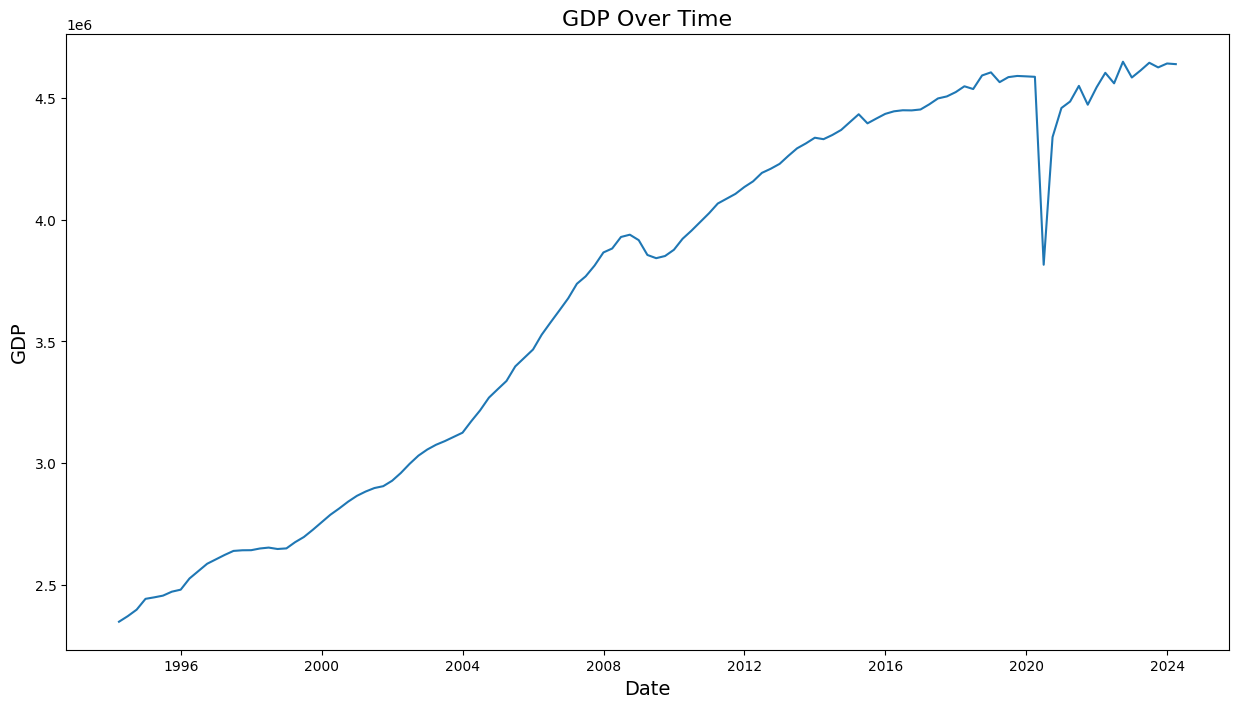

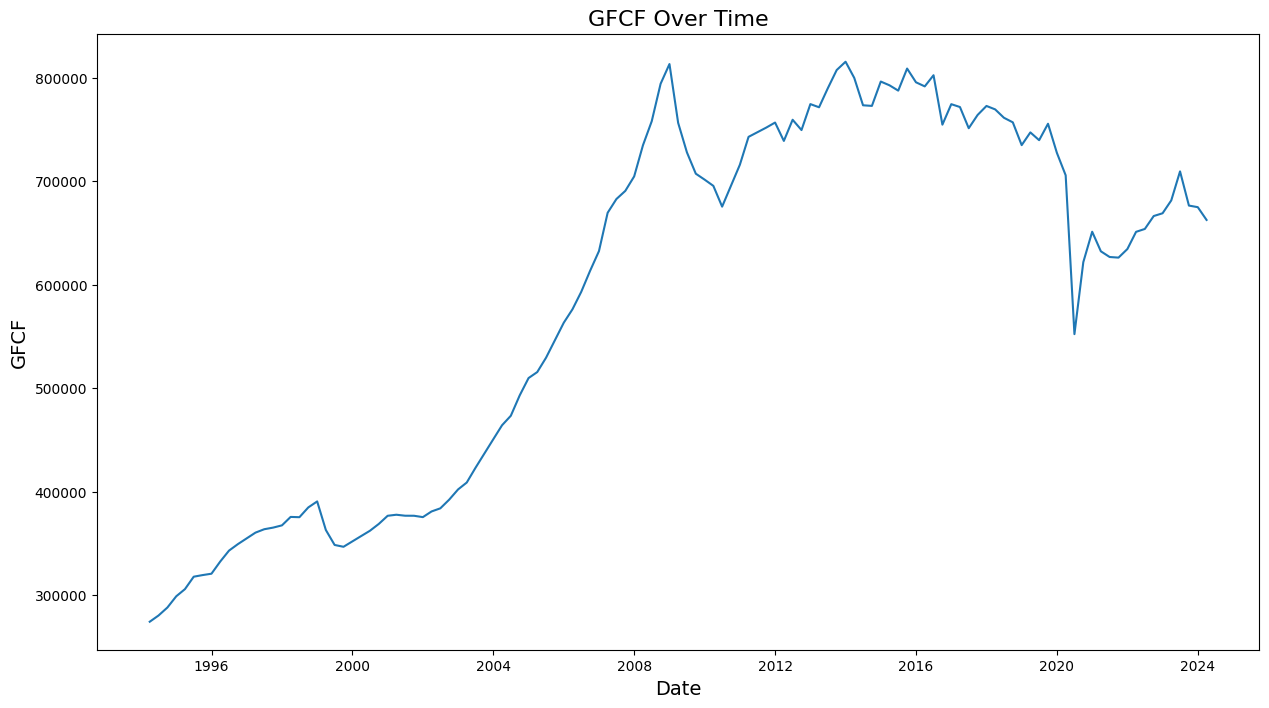

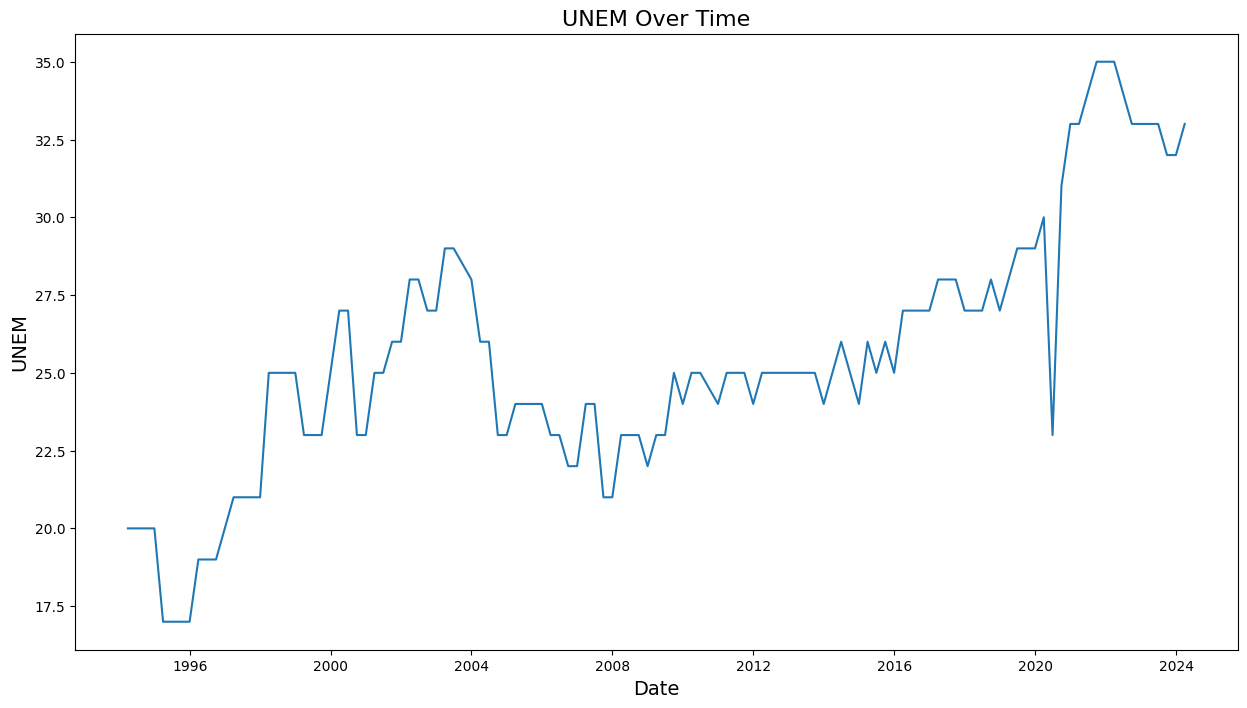

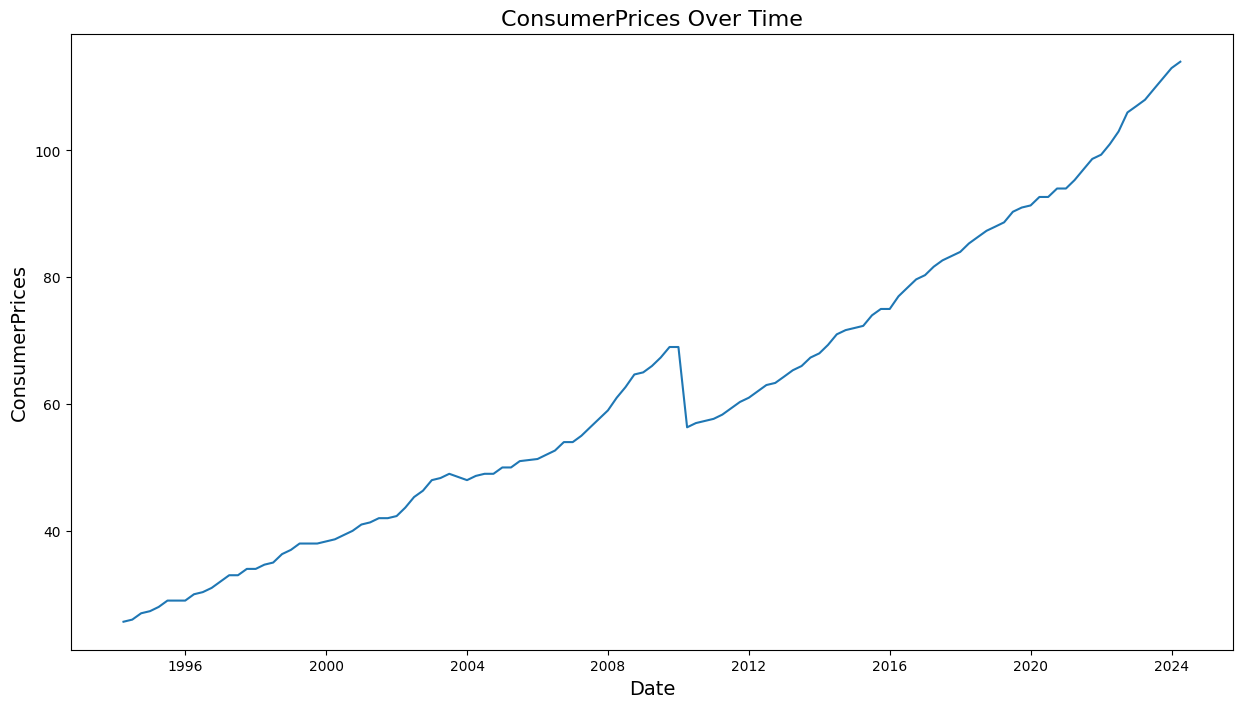

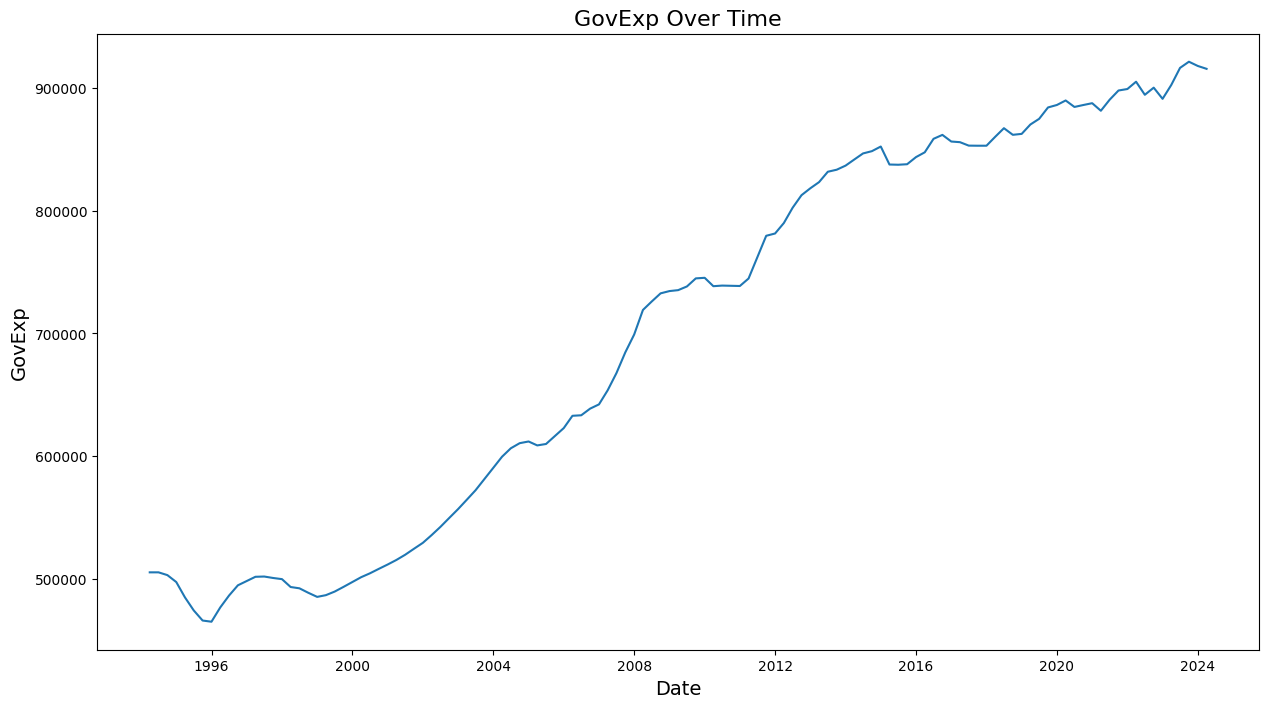

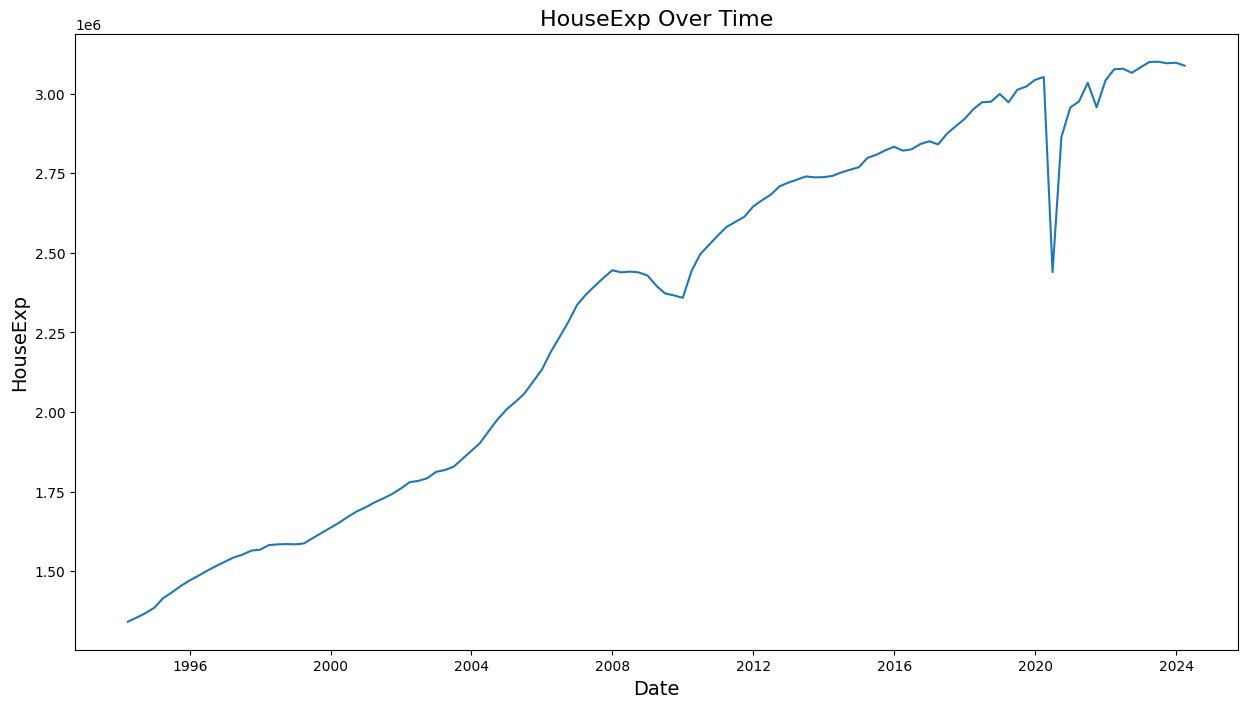

In [196]:
features = [col for col in df.columns if col != 'Date']

for col in features:
    plt.figure(figsize=(15, 8))
    sns.lineplot(x='Date', y=col, data=df)
    plt.title(f'{col} Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(f'{col}', fontsize=14)
    plt.show()

## Multivariate Analysis

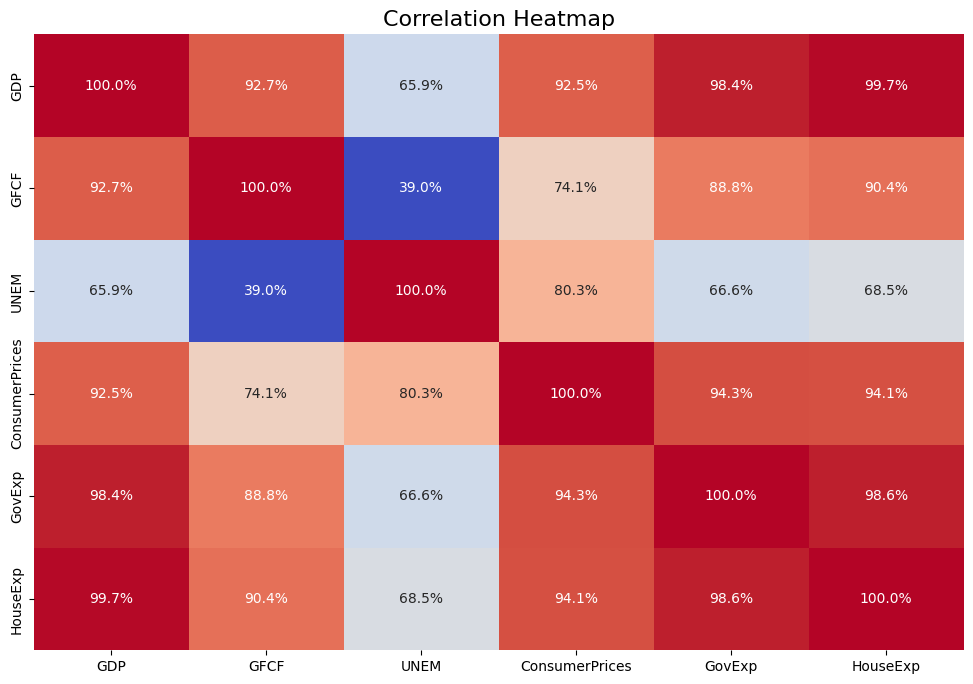

In [197]:
corr_matrix = df.drop(columns='Date').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1%', cbar=False)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# 4. Model Training and Evaluation